In [1]:
!pip3 install tensorflow==2.7.0

import tensorflow as tf
from tensorflow import keras

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from sklearn.model_selection import train_test_split

#set random
np_state = np.random.RandomState(2019)

2022-02-17 13:25:44.514868: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-17 13:25:44.514890: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
filename = 'mini_mnist.csv'

In [3]:
def bar_custom(current, total, width=100):
    print("Downloading: %d%% [%d / %d] bytes" % (current / total * 100, current, total))

#Don't think too much about the getDataset method. It is used for convenience
def getDataset(filename, **kwargs):
    url = f'https://github.com/IvanReznikov/mdx-msc-data-science/raw/main/datasets/{filename}'
    try:
        import os
        if filename not in os.listdir():
            !pip3 install wget
            import wget
            downloaded_filename = wget.download(url)
            print(f'{downloaded_filename} file downloaded', bar=bar_custom)
        else:
            print(f'{filename} already exists')
        return pd.read_csv(filename, **kwargs)
        
    except Exception as e:
        print(e)
        return pd.read_csv(url, **kwargs)

Let's take a look at our data

In [4]:
data = getDataset(filename, index_col = [0])
data.head(5)

mini_mnist.csv already exists


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data.shape

(12500, 785)

Split data to target and features

In [6]:
X = data.iloc[:,1:]
y = data.iloc[:,0]

## Preview

In [7]:
#idx = np_state.randint(0, data.shape[0])
idx = 10000

Data as an array:

In [8]:
X.iloc[idx, :].values.reshape(28,28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  39,  91,  91,  91,  91,
         91, 191, 255, 142,  91,  23,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

(<matplotlib.image.AxesImage at 0x7f1fdd9f6880>, 2)

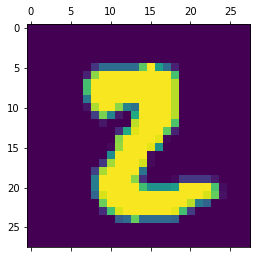

In [9]:
plt.matshow(X.iloc[idx,:].values.reshape(28,28)), y[idx]

### Split train_test

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<AxesSubplot:>

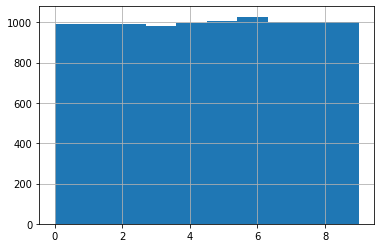

In [11]:
y_train.hist()

<AxesSubplot:>

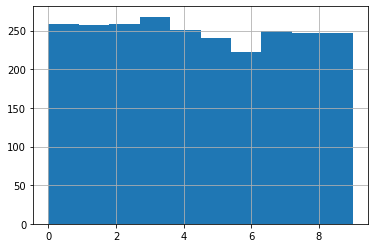

In [12]:
y_test.hist()

## Simple neural network in Keras

In [13]:
# Sequential create a stack of layers
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='softmax')
])

2022-02-17 13:25:47.737612: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-02-17 13:25:47.737634: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-17 13:25:47.737678: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ivan-ThinkPad-T590): /proc/driver/nvidia/version does not exist
2022-02-17 13:25:47.737877: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [15]:
#784 -> 10 neurons
#784*10 - weights
#10 - biases

784*10 + 10

7850

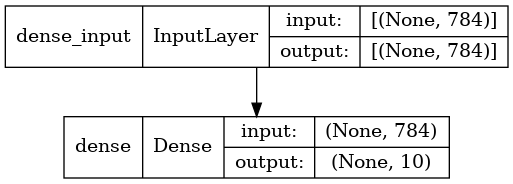

In [16]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [17]:
# Optimizer will help in backproagation to reach better global optima
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Does the training
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
313/313 [==============================] - 1s 1ms/step - loss: 22.0546 - accuracy: 0.7250
Epoch 2/5
313/313 [==============================] - 0s 1ms/step - loss: 7.4738 - accuracy: 0.8560
Epoch 3/5
313/313 [==============================] - 0s 1ms/step - loss: 5.8948 - accuracy: 0.8756
Epoch 4/5
313/313 [==============================] - 0s 1ms/step - loss: 4.8613 - accuracy: 0.8854
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 4.7723 - accuracy: 0.8925


In [18]:
model.evaluate(X_test, y_test)

79/79 [==============================] - 0s 568us/step - loss: 7.1615 - accuracy: 0.8676


[7.161506175994873, 0.8676000237464905]

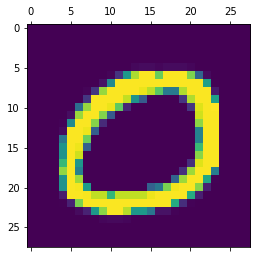

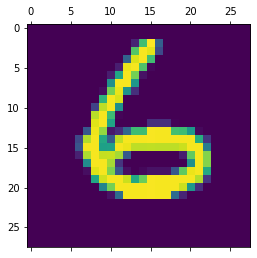

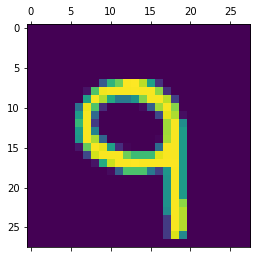

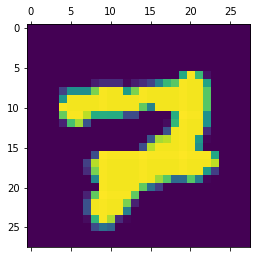

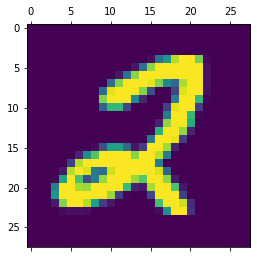

In [19]:
# Show the image
for i in range(5):
    #idx not i
    plt.matshow(X_test.iloc[i,:].values.reshape(28,28))

In [20]:
# Make the predictions
y_predicted = model.predict(X_test)

In [21]:
for i in range(5):
    print(y_predicted[i])
    print(np.argmax(y_predicted[i]))

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
6
[0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 8.917412e-33
 0.000000e+00 0.000000e+00 6.380500e-34 0.000000e+00 1.000000e+00]
9
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
7
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
2


In [22]:
# converting y_predicted from whole numbers to integers
# so that we can use it in confusion matrix
# In short we are argmaxing the entire prediction
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5], y_test.iloc[:5].values

([0, 6, 9, 7, 2], array([0, 6, 9, 7, 2]))

In [23]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[242,   0,   1,   1,   0,   5,   7,   1,   2,   0],
       [  0, 250,   1,   0,   0,   0,   0,   1,   5,   0],
       [  5,   4, 223,   3,   1,   4,   5,   8,   5,   0],
       [  0,   1,   8, 220,   0,  23,   3,   3,   6,   4],
       [  1,   1,   0,   0, 215,   1,   4,   5,   0,  24],
       [  5,   1,   1,   5,   1, 208,   6,   1,   9,   4],
       [  3,   1,   2,   0,   1,   9, 205,   1,   0,   0],
       [  1,   2,   7,   3,   1,   0,   1, 208,   0,  27],
       [  1,   8,   1,   9,   3,  27,   0,   2, 180,  16],
       [  2,   1,   4,   2,   3,   6,   1,   9,   1, 218]], dtype=int32)>

Text(69.0, 0.5, 'Truth')

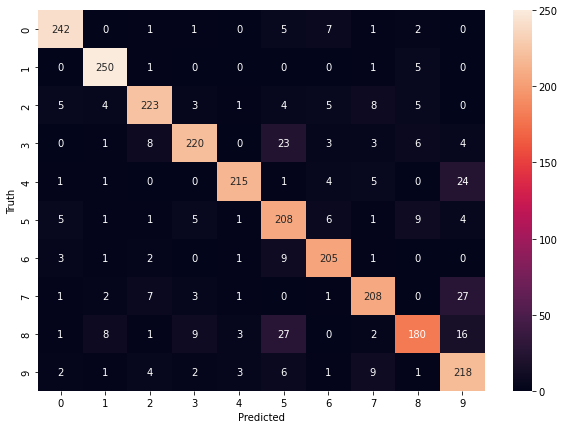

In [24]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Adding a hidden layer

In [25]:
X_train.shape

(10000, 784)

In [26]:
# Sequential create a stack of layers
# Create a hidden layer with 100 neurons and relu activation
model = keras.Sequential([
    keras.layers.Dense(250, input_shape=(784,), activation='sigmoid'),
    keras.layers.Dense(10, activation='tanh'),
    keras.layers.Dense(250, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 250)               196250    
                                                                 
 dense_2 (Dense)             (None, 10)                2510      
                                                                 
 dense_3 (Dense)             (None, 250)               2750      
                                                                 
 dense_4 (Dense)             (None, 10)                2510      
                                                                 
Total params: 204,020
Trainable params: 204,020
Non-trainable params: 0
_________________________________________________________________


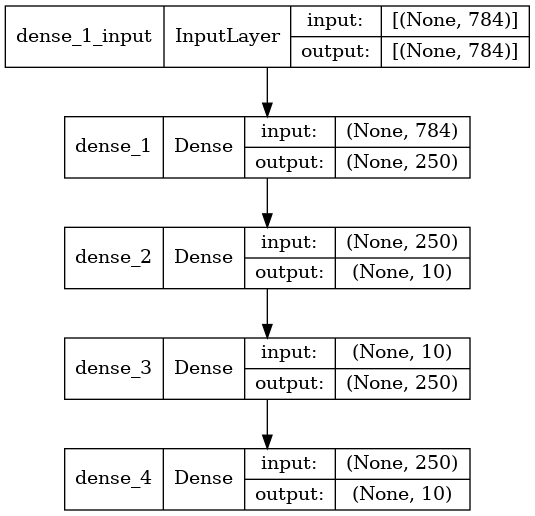

In [28]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [29]:
# Optimizer will help in backproagation to reach better global optima
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
# Does the training
model.fit(X_train, y_train, epochs=40)

Epoch 1/40
313/313 [==============================] - 1s 1ms/step - loss: 0.9418 - accuracy: 0.7179
Epoch 2/40
313/313 [==============================] - 0s 1ms/step - loss: 0.4832 - accuracy: 0.8457
Epoch 3/40
313/313 [==============================] - 0s 1ms/step - loss: 0.4130 - accuracy: 0.8685
Epoch 4/40
313/313 [==============================] - 0s 1ms/step - loss: 0.4098 - accuracy: 0.8676
Epoch 5/40
313/313 [==============================] - 0s 1ms/step - loss: 0.3965 - accuracy: 0.8758
Epoch 6/40
313/313 [==============================] - 0s 1ms/step - loss: 0.3583 - accuracy: 0.8838
Epoch 7/40
313/313 [==============================] - 0s 1ms/step - loss: 0.3462 - accuracy: 0.8887
Epoch 8/40
313/313 [==============================] - 0s 1ms/step - loss: 0.3663 - accuracy: 0.8788
Epoch 9/40
313/313 [==============================] - 0s 1ms/step - loss: 0.3643 - accuracy: 0.8854
Epoch 10/40
313/313 [==============================] - 0s 1ms/step - loss: 0.3359 - accuracy: 0.8944

In [30]:
model.evaluate(X_test, y_test)

79/79 [==============================] - 0s 849us/step - loss: 0.2976 - accuracy: 0.9096


[0.29759928584098816, 0.909600019454956]

In [31]:
y_predicted = model.predict(X_test)

In [32]:
for i in range(5):
    print(y_predicted[i])
    print(np.argmax(y_predicted[i]))

[9.99446213e-01 2.02084925e-06 2.14550178e-04 4.22317817e-06
 1.33666504e-07 2.08659345e-04 1.27443955e-05 3.62881110e-06
 3.67489884e-05 7.10559616e-05]
0
[6.0958955e-05 6.8459991e-07 1.5447322e-04 3.3361382e-06 2.9750332e-05
 1.0057844e-04 9.9963200e-01 1.3593722e-06 1.6844273e-05 4.6861203e-08]
6
[4.1757588e-07 7.6613574e-08 1.3862194e-04 6.7240285e-04 1.0363405e-03
 2.3070289e-04 3.5228513e-08 1.3317596e-03 2.3431829e-04 9.9635530e-01]
9
[1.4213970e-01 3.3196018e-05 1.7292971e-02 7.9031335e-05 3.2848441e-03
 4.0806987e-04 1.1724402e-03 7.9487211e-01 2.7449552e-03 3.7972685e-02]
7
[4.1708912e-04 4.2632339e-04 9.8243976e-01 6.0897837e-03 9.5265091e-07
 2.7673152e-06 1.3985299e-06 2.9413537e-03 7.6770270e-03 3.5323042e-06]
2


In [33]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5], y_test.iloc[:5].values

([0, 6, 9, 7, 2], array([0, 6, 9, 7, 2]))

In [34]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[250,   0,   1,   1,   1,   1,   3,   0,   2,   0],
       [  0, 253,   0,   1,   0,   1,   1,   0,   1,   0],
       [  2,   3, 233,   6,   4,   0,   1,   5,   4,   0],
       [  0,   0,   5, 252,   0,   5,   0,   3,   3,   0],
       [  2,   1,   0,   0, 224,   0,   5,   3,   3,  13],
       [  3,   0,   0,  15,   2, 216,   1,   1,   2,   1],
       [  3,   1,   3,   3,   2,   5, 205,   0,   0,   0],
       [  0,   4,   4,   2,   1,   0,   1, 232,   1,   5],
       [  0,   2,   1,  21,   0,  11,   2,   0, 209,   1],
       [  5,   1,   0,   4,  13,   5,   0,  16,   3, 200]], dtype=int32)>

Text(69.0, 0.5, 'Truth')

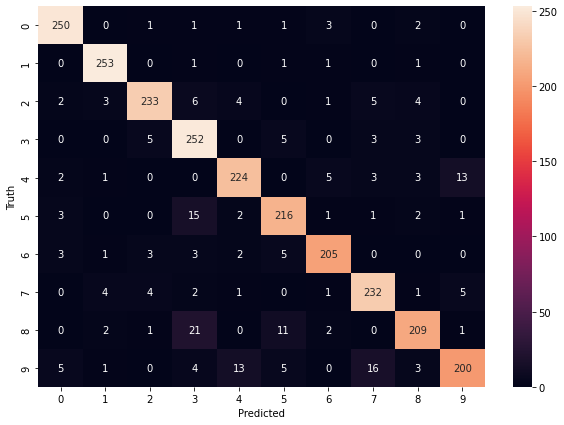

In [35]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

- Activation Functions — https://keras.io/api/layers/activations/
- Optimizers — https://keras.io/api/optimizers/
- Loss functions — https://keras.io/api/losses/

In [36]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

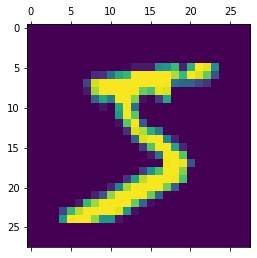

In [37]:
x_train[0]

plt.matshow(x_train[0])

In [38]:
x_train = x_train.reshape(x_train.shape[0], 1, 28*28)
x_train = x_train.astype('float32')
x_train /= 255

In [39]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [40]:
x_train = x_train.flatten()
x_test = x_test.flatten()

x_train

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [41]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

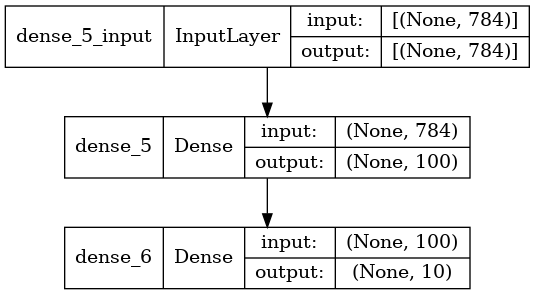

In [42]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [43]:
# Optimizer will help in backproagation to reach better global optima
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
# Does the training
model.fit(x_train, y_train, epochs=5)

ValueError: Data cardinality is ambiguous:
  x sizes: 47040000
  y sizes: 60000
Make sure all arrays contain the same number of samples.

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
y_predicted = model.predict(X_test)

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm